In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('stats.csv')

In [3]:
df_copy=df.copy()
#Adding backup

In [4]:
df.sample(7)

,Roll No,Name,CGPA,Branch,Role,Duration,Gender,Company,Stpd,CTC,Details,#,Additional Info
360,2K21/MC/132,Rahul Sharma,8.31,MCE,Analyst,6M + FTE,M,PhonePe,40.0,16.00,40K pm\n16 lpa,4.0,Graduate Trainee Analyst
698,2K21/PE/017,Chinmay Kaushik,8.75,PE,SDE,FTE,M,NaN,NaN,11.00,NaN,NaN,NaN
179,2K21/IT/152,Rupesh Sharda,8.91,IT,SDE,6M + PPO,M,NaN,98.0,24.70,NaN,NaN,NaN
600,2K21/IT/093,Kanishk Srivastava,8.71,IT,SDE,6M + FTE,M,NaN,25.0,12.00,NaN,NaN,NaN
1002,2K21/ME/245,Saransh Verma,8,ME,Core,FTE,M,Technip Energies,NaN,6.50,6.5 lpa,3.0,NaN
384,2K21/SE/162,Sarthak Sarkar,8.99,SE,SDE,FTE,M,NaN,50.0,15.50,NaN,NaN,NaN
721,2K21/CO/218,Kanhaiya Singh,7.82,CO,SDE,FTE,M,NaN,NaN,10.14,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0    Roll No         1145 non-null   object 
 1   Name             1145 non-null   object 
 2   CGPA             1145 non-null   object 
 3   Branch           1145 non-null   object 
 4   Role             1087 non-null   object 
 5   Duration         1145 non-null   object 
 6   Gender           1145 non-null   object 
 7   Company          193 non-null    object 
 8   Stpd             545 non-null    float64
 9   CTC              1114 non-null   float64
 10  Details          204 non-null    object 
 11  #                229 non-null    float64
 12  Additional Info  102 non-null    object 
dtypes: float64(3), object(10)
memory usage: 116.4+ KB


It would be safe to drop the following columns:
- 'Company'
- 'Stpd'
- 'Details'
- '#'
- "Additional info'
as there is more than 80-85% of the data missing in these columns, so it would do no good in analysis.

In [6]:
df.drop(columns=['Company', 'Stpd', 'Details', '#', 'Additional Info'], inplace=True)

In [7]:
df.dtypes

 Roll No     object
Name         object
CGPA         object
Branch       object
Role         object
Duration     object
Gender       object
CTC         float64
dtype: object

We need to convert CGPA to float

In [8]:
df['CGPA']=pd.to_numeric(df['CGPA'], errors='coerce')

In [9]:
df_copy=df.copy()
#Updating the backup

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    Roll No  1145 non-null   object 
 1   Name      1145 non-null   object 
 2   CGPA      1082 non-null   float64
 3   Branch    1145 non-null   object 
 4   Role      1087 non-null   object 
 5   Duration  1145 non-null   object 
 6   Gender    1145 non-null   object 
 7   CTC       1114 non-null   float64
dtypes: float64(2), object(6)
memory usage: 71.7+ KB


In [11]:
df['Role'].fillna("NO DATA", inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_24204\4254689296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Role'].fillna("NO DATA", inplace=True)


In [12]:
print(df.duplicated().sum())
# Checking for duplicated rows

0


#### Now our data is ready for analysis

## EDA:

### Univariate

In [12]:
print('CGPA Analysis\n\n', df['CGPA'].describe())

CGPA Analysis

 count    1082.000000
mean        8.220702
std         0.846780
min         4.650000
25%         7.700000
50%         8.360000
75%         8.830000
max         9.890000
Name: CGPA, dtype: float64


In [16]:
sns.set_style('darkgrid')

<Axes: xlabel='CGPA', ylabel='Count'>

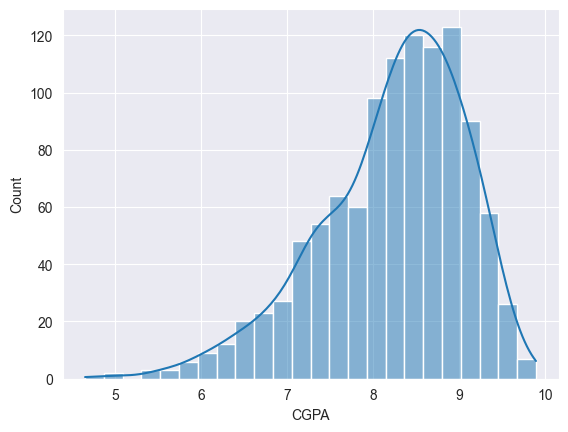

In [14]:
sns.histplot(df['CGPA'], kde=True)

In [16]:
df['Branch'].value_counts()
#No. of students placed by branch

Branch
CO     321
IT     124
ME     115
EE     107
ECE    107
SE     101
MCE     95
CE      45
EP      39
EN      22
PE      22
CH      20
AE      20
BT       7
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Students Placed by Branch')

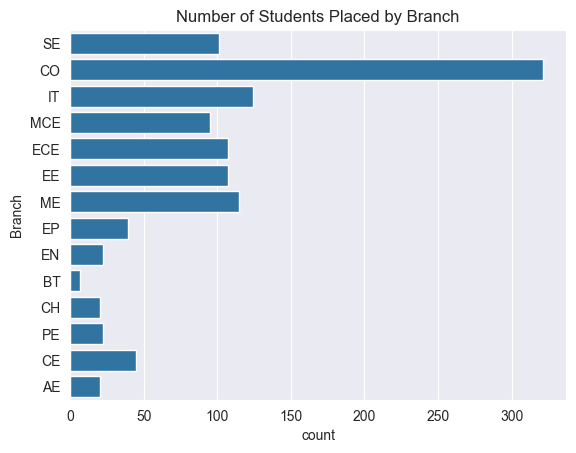

In [17]:
sns.countplot(y='Branch', data=df)
plt.title('Number of Students Placed by Branch')

In [18]:
df['Role'].value_counts()
#No. of students placed by roles

Role
SDE                     601
Analyst                 272
Core                     85
Other                    84
NO DATA                  58
Data Science             15
Digital                   9
Embedded                  6
Markets                   6
Application Engineer      4
Software                  3
Analog                    2
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Students Placed by roles')

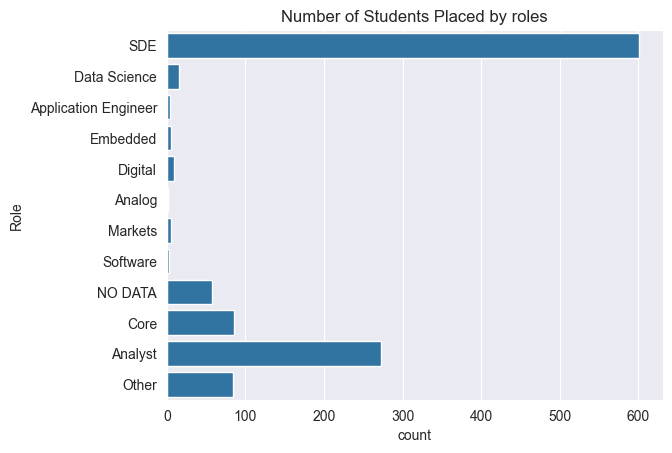

In [19]:
sns.countplot(y='Role', data=df)
plt.title('Number of Students Placed by roles')

In [14]:
df['Duration'].value_counts()
#type of offers recieved

Duration
FTE             464
6M + PPO        345
6M + FTE        190
PPO             100
Intern + FTE     34
Intern + PPO     12
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Students by Placement Duration/Type')

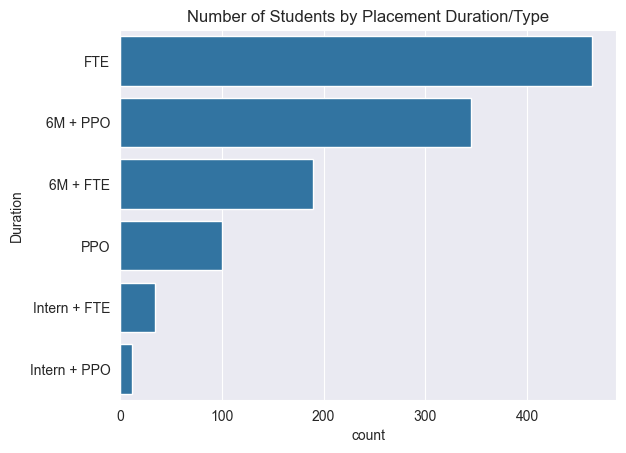

In [21]:
sns.countplot(y='Duration', data=df)
plt.title("Number of Students by Placement Duration/Type")


In [22]:
df['Gender'].value_counts()
#No. of Male/Female students placed

Gender
M    1072
F      73
Name: count, dtype: int64

In [23]:
print('CTC Analysis\n (all values in LPA)\n\n', df['CTC'].describe())

CTC Analysis
 (all values in LPA)

 count    1114.000000
mean       16.516768
std        11.685788
min         3.300000
25%         9.000000
50%        12.600000
75%        20.000000
max        85.000000
Name: CTC, dtype: float64


Text(0.5, 1.0, 'CTC analysis')

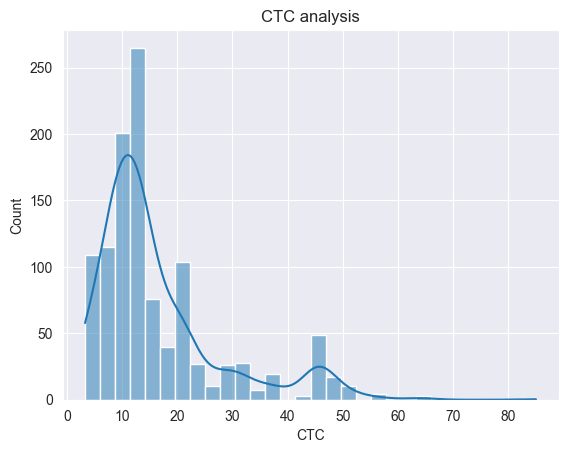

In [94]:
sns.histplot(df['CTC'], kde=True, bins=30)
plt.title('CTC analysis')

#### No. of students placed with CTC >=30LPA:

In [31]:
mask = (df['CTC'] >= 30)

result = (
    df[mask]
    .groupby('Branch')
    .agg(
        Count=('Branch', 'size'),
        Mean_CGPA=('CGPA', 'mean')
    )
    .sort_values('Count', ascending=False)
)

print(result)
print('\nTotal =', result['Count'].sum())


        Count  Mean_CGPA
Branch                  
CO         68   8.897164
SE         21   8.750476
IT         17   8.888750
ECE        15   8.500769
EE         12   8.949167
MCE        11   8.860909
BT          1   8.120000
EN          1   8.010000
EP          1   7.910000
ME          1   8.300000

Total = 148


#### No. of students placed with CTC between 15LPA and 30LPA:

In [30]:
mask = (df['CTC'] >= 15) & (df['CTC'] < 30)

result = (
    df[mask]
    .groupby('Branch')
    .agg(
        Count=('Branch', 'size'),
        Mean_CGPA=('CGPA', 'mean')
    )
    .sort_values('Count', ascending=False)
)

print(result)
print('\nTotal =', result['Count'].sum())


        Count  Mean_CGPA
Branch                  
CO        113   8.638257
IT         38   8.755135
SE         24   8.750417
ECE        24   8.510000
MCE        21   8.460476
EE         13   8.460000
ME         11   8.661000
EP          5   8.997500
CE          2   8.140000
CH          2   8.980000
PE          2   7.775000
EN          1   9.040000

Total = 256


### Bivariate/ multivariate analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    Roll No  1145 non-null   object 
 1   Name      1145 non-null   object 
 2   CGPA      1082 non-null   float64
 3   Branch    1145 non-null   object 
 4   Role      1145 non-null   object 
 5   Duration  1145 non-null   object 
 6   Gender    1145 non-null   object 
 7   CTC       1114 non-null   float64
dtypes: float64(2), object(6)
memory usage: 71.7+ KB


To be analysed:

BIVARIATE
- CGPA vs CTC
- Branch vs CGPA (shows difficulty of branches)
- Role vs CGPA (shows which roles required higher CGPAs)
- Branch vs Role (shows which branch produces which roles)
- Branch vs CTC
- Role vs CTC

MULTIVARIATE
- Branch vs Role vs CTC (shows which roles have different pays according to branches)
- Branch vs CGPA vs Role (gives an insight of how much cgpa is good for a specific role- branchwise)

In [27]:
df[['CGPA', 'CTC']].corr()

,CGPA,CTC
CGPA,1.000000,0.475567
CTC,0.475567,1.000000


CTC has moderately-strong correlation with CGPA

Text(0.5, 1.0, 'Relationship between CTC and CGPA')

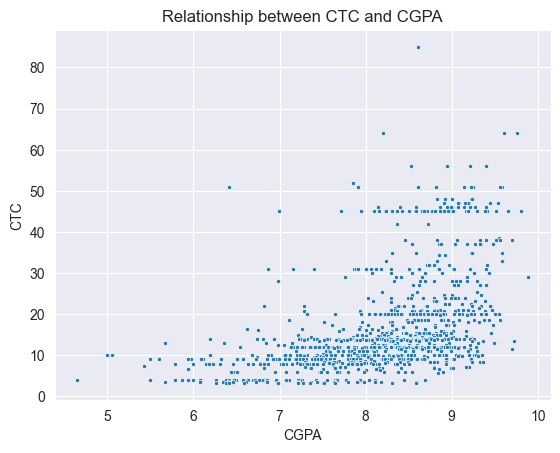

In [32]:
sns.scatterplot(x='CGPA', y='CTC', data=df, marker='.')
plt.title("Relationship between CTC and CGPA")

In [40]:
df.groupby('Branch')['CGPA'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
CH,18.0,8.296667,0.971076,6.08,7.9725,8.585,8.9250,9.49
SE,99.0,8.495051,0.663791,5.78,8.2150,8.570,8.9450,9.63
CO,310.0,8.466871,0.722491,5.42,8.1400,8.530,8.9700,9.89
IT,116.0,8.418190,0.787727,5.05,7.9875,8.460,9.0300,9.66
EP,34.0,8.270000,0.826456,6.11,7.8650,8.460,8.8400,9.36
ME,109.0,8.088991,0.873237,5.00,7.4600,8.260,8.7900,9.70
CE,37.0,8.135405,0.644854,6.74,7.7400,8.230,8.5900,9.17
MCE,95.0,8.150421,0.717623,6.36,7.6100,8.200,8.7150,9.46
EN,17.0,7.870000,0.751449,6.47,7.3500,8.010,8.6200,9.04


<Axes: xlabel='CGPA', ylabel='Branch'>

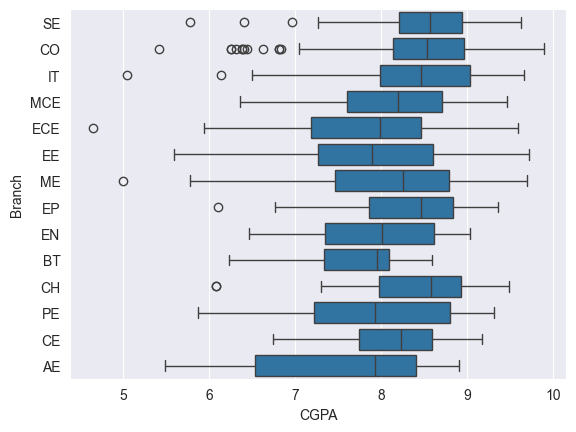

In [34]:
sns.boxplot(y='Branch', x='CGPA', data=df)

In [44]:
df.groupby('Role')['CGPA'].describe().sort_values('min', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Role,,,,,,,,
Analog,2.0,9.540000,0.028284,9.52,9.5300,9.540,9.5500,9.56
Software,3.0,9.083333,0.227450,8.83,8.9900,9.150,9.2100,9.27
Application Engineer,3.0,9.176667,0.813040,8.24,8.9150,9.590,9.6450,9.70
Digital,8.0,8.827500,0.443227,8.09,8.6175,8.810,9.0900,9.40
Embedded,5.0,8.568000,0.733328,7.44,8.3500,8.660,9.0600,9.33
Markets,6.0,8.521667,0.821156,6.98,8.4200,8.760,8.9575,9.30
Data Science,15.0,7.727333,0.483225,6.87,7.2800,7.890,8.0350,8.35
Analyst,253.0,8.088340,0.785319,5.60,7.5700,8.200,8.6400,9.72
NO DATA,56.0,7.951607,0.838190,5.42,7.4675,8.115,8.4975,9.29


Text(0.5, 1.0, 'Relation between Roles and CGPA')

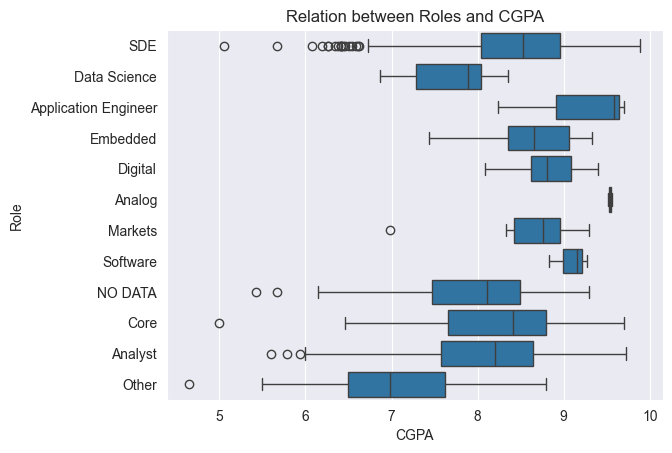

In [46]:
sns.boxplot(y='Role', x='CGPA', data=df)
plt.title('Relation between Roles and CGPA')

In [20]:
roles=df.groupby('Role')['Branch'].value_counts().reset_index(name='count')

In [19]:
roles

,Role,Branch,count
0,Analog,EE,2
1,Analyst,ME,51
2,Analyst,CO,34
3,Analyst,EE,33
4,Analyst,ECE,30
...,...,...,...
81,SDE,BT,1
82,SDE,CH,1
83,Software,CO,1
84,Software,ECE,1


In [21]:
mean_ctc = df.groupby(['Role', 'Branch'])['CTC'].mean().reset_index(name='mean_ctc')
roles = roles.merge(mean_ctc, on=['Role', 'Branch'], how='left')
roles

,Role,Branch,count,mean_ctc
0,Analog,EE,2,38.000000
1,Analyst,ME,51,12.534902
2,Analyst,CO,34,12.658824
3,Analyst,EE,33,10.935455
4,Analyst,ECE,30,10.901333
...,...,...,...,...
81,SDE,BT,1,11.000000
82,SDE,CH,1,3.600000
83,Software,CO,1,23.100000
84,Software,ECE,1,23.100000


In [22]:
for i in set(df['Role']):
    print (roles[roles['Role']==i][['Role', 'Branch', 'count', 'mean_ctc']],'\nTotal = ', roles[roles['Role']==i]['count'].sum(), '\n')

     Role Branch  count  mean_ctc
57  Other    ECE     14  5.785714
58  Other     ME     14  5.785714
59  Other     EN     11  9.145455
60  Other     PE      8  5.875000
61  Other     EE      7  4.987143
62  Other     CE      6  7.333333
63  Other     SE      5  6.800000
64  Other     AE      4  5.250000
65  Other     EP      4  7.870000
66  Other     CH      3  7.333333
67  Other     CO      3  6.666667
68  Other     IT      3  7.333333
69  Other    MCE      2  4.000000 
Total =  84 

        Role Branch  count   mean_ctc
37  Embedded    ECE      3  21.993333
38  Embedded     CO      2  38.000000
39  Embedded     EE      1   8.000000 
Total =  6 

     Role Branch  count  mean_ctc
0  Analog     EE      2      38.0 
Total =  2 

       Role Branch  count   mean_ctc
45  NO DATA     CO     11  18.090909
46  NO DATA     ME      9  12.544444
47  NO DATA    MCE      7  13.285714
48  NO DATA     CE      6   8.373333
49  NO DATA    ECE      6  17.500000
50  NO DATA     IT      6   9.166667
51

In [78]:
df.groupby('Branch')['CTC'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
CO,305.0,21.450230,13.371026,3.3,12.0000,16.500,28.000,64.00
SE,96.0,20.545625,14.895603,3.3,11.9850,14.000,24.175,85.00
IT,117.0,18.567350,11.506854,4.0,10.0400,14.200,21.000,56.00
ECE,107.0,15.938037,11.084163,3.6,8.2650,12.000,21.300,45.00
MCE,93.0,15.767742,10.547352,3.3,10.0000,13.000,18.000,48.00
BT,7.0,14.200000,7.825386,7.8,9.7500,13.000,14.050,31.00
EE,106.0,13.920472,10.206070,3.3,8.0000,11.000,14.000,45.00
EP,39.0,11.706667,5.389476,3.3,8.7500,11.000,14.000,31.00
EN,22.0,11.328182,6.065840,4.0,8.1625,12.300,12.600,31.00


Text(0.5, 1.0, 'Branch wise CTC')

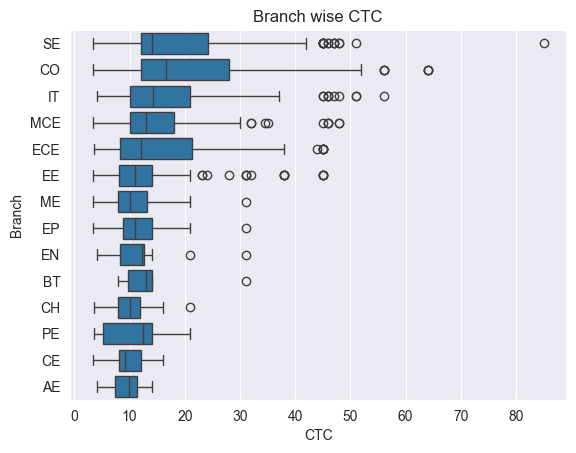

In [92]:
sns.boxplot(y='Branch', x='CTC', data=df)
plt.title('Branch wise CTC')

In [82]:
df.groupby('Role')['CTC'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Role,,,,,,,,
Analog,2.0,38.000000,0.000000,38.0,38.0000,38.00,38.0000,38.00
Application Engineer,4.0,37.000000,5.228129,33.0,33.0000,35.50,39.5000,44.00
Markets,6.0,29.666667,4.082483,28.0,28.0000,28.00,28.0000,38.00
Digital,9.0,28.266667,7.309241,23.1,23.1000,24.00,38.0000,38.00
Data Science,15.0,27.406667,10.939213,10.0,23.5500,31.00,31.0000,52.00
Embedded,6.0,24.996667,13.768371,8.0,13.2475,28.99,35.7475,38.00
Software,3.0,23.400000,0.519615,23.1,23.1000,23.10,23.5500,24.00
SDE,570.0,20.445018,13.705667,3.3,12.0000,15.50,27.0000,85.00
NO DATA,58.0,13.628621,6.078568,6.0,9.5600,11.00,20.1000,24.00


### MULTIVARIATE

In [14]:
pivot = df.pivot_table(values='CTC', index='Branch', columns='Role', aggfunc='mean')
pivot

Role,Analog,Analyst,Application Engineer,Core,Data Science,Digital,Embedded,Markets,NO DATA,Other,SDE,Software
Branch,,,,,,,,,,,,
AE,NaN,10.761818,NaN,6.000000,NaN,NaN,NaN,NaN,11.000000,5.250000,11.500000,NaN
BT,NaN,11.100000,NaN,NaN,31.0,NaN,NaN,NaN,13.000000,NaN,11.000000,NaN
CE,NaN,11.953125,NaN,9.353333,NaN,NaN,NaN,NaN,8.373333,7.333333,3.450000,NaN
CH,NaN,12.128462,NaN,6.966667,NaN,NaN,NaN,NaN,NaN,7.333333,3.600000,NaN
CO,NaN,12.658824,NaN,11.500000,31.0,NaN,38.000000,28.0,18.090909,6.666667,22.681457,23.1
ECE,NaN,10.901333,36.666667,13.671429,31.0,29.24,21.993333,38.0,17.500000,5.785714,18.610000,23.1
EE,38.0,10.935455,38.000000,11.312222,31.0,27.05,8.000000,28.0,16.050000,4.987143,14.902121,NaN
EN,NaN,12.357143,NaN,12.000000,31.0,NaN,NaN,NaN,9.560000,9.145455,NaN,NaN
EP,NaN,12.377391,NaN,NaN,31.0,NaN,NaN,NaN,11.000000,7.870000,9.550000,NaN


Text(0.5, 1.0, 'Ditsribution of mean CTCs across roles- Branch wise')

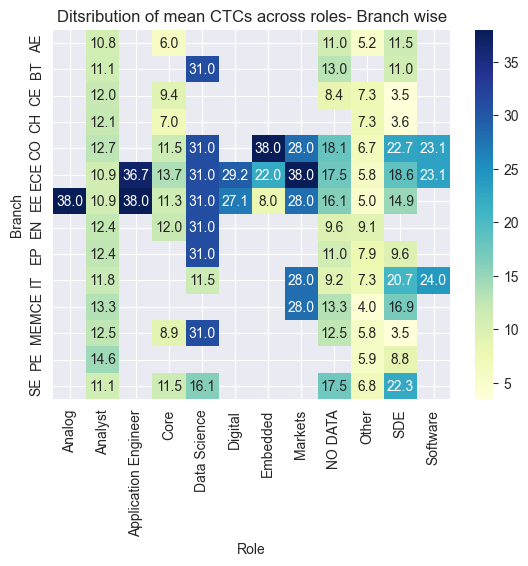

In [17]:
sns.heatmap(pivot, annot=True, fmt='.1f', cmap="YlGnBu")
plt.title('Ditsribution of mean CTCs across roles- Branch wise')

In [99]:
piv=df.pivot_table(values='CGPA', index='Branch', columns='Role', aggfunc='min')
piv

Role,Analog,Analyst,Application Engineer,Core,Data Science,Digital,Embedded,Markets,NO DATA,Other,SDE,Software
Branch,,,,,,,,,,,,
AE,NaN,6.18,NaN,NaN,NaN,NaN,NaN,NaN,8.09,5.49,7.84,NaN
BT,NaN,6.23,NaN,NaN,8.12,NaN,NaN,NaN,7.15,NaN,NaN,NaN
CE,NaN,7.14,NaN,7.06,NaN,NaN,NaN,NaN,6.74,7.93,8.59,NaN
CH,NaN,7.97,NaN,7.30,NaN,NaN,NaN,NaN,NaN,6.08,6.08,NaN
CO,NaN,6.31,NaN,8.41,7.05,NaN,9.06,8.33,5.42,6.38,6.26,8.83
ECE,NaN,5.94,8.24,7.60,7.86,8.09,7.44,8.83,7.19,4.65,6.34,9.27
EE,9.52,5.60,9.70,6.46,6.87,8.82,NaN,8.69,5.67,6.79,5.67,NaN
EN,NaN,7.26,NaN,8.65,8.01,NaN,NaN,NaN,7.40,6.47,NaN,NaN
EP,NaN,6.77,NaN,NaN,7.91,NaN,NaN,NaN,7.57,6.11,7.98,NaN


Text(0.5, 1.0, 'Min. CGPA required for roles- Branch wise')

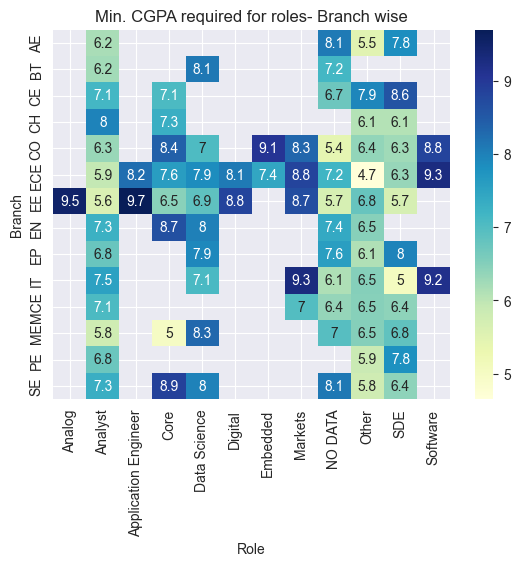

In [102]:
sns.heatmap(piv, annot=True, cmap='YlGnBu')
plt.title('Min. CGPA required for roles- Branch wise')